<a href="https://colab.research.google.com/github/Ulrike13/CodesForMirea/blob/main/FriendsTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

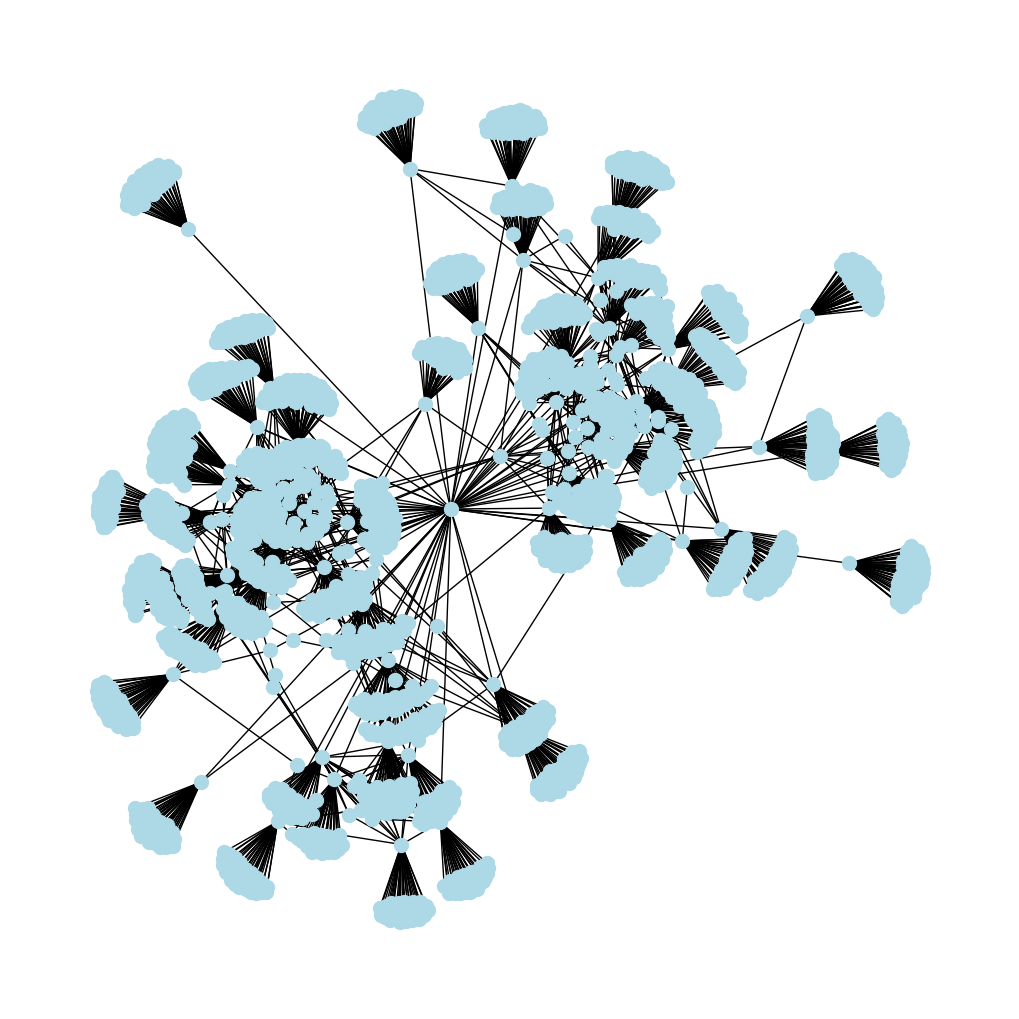

In [8]:
import requests
import networkx as nx
import matplotlib.pyplot as plt

# access token и ID профиля VK
access_token = 'vk1.a.p0wgbgeWapM6kbz1NCi-CpVoYugfu8OV8myqTPKWDrIZNZCrNdkaYoyRjo53DmRERVEMKL2H5tdtkna_9nujIDsvTBONZGcxZsnsgSVWbSXit5w2F4wAC6ruubfvOfoHiDQRec0T0NqOuGavQOZr0XTA6WcLb2XFmBB24AxmA9lLi158jwart4KOWfekH9YcnhiWIjxCWKe3YNQT6FPt'
user_id = '20983458'

# считывание данных о друзьях друга
response = requests.get(f'https://api.vk.com/method/friends.get?user_id={user_id}&access_token={access_token}&v=5.131')
data = response.json()

# проверка на ошибки
if 'error' in data:
    print('Ошибка при получении данных:', data['error']['error_msg'])
else:

    G = nx.Graph()
    G.add_node(user_id)

    # добавляем друзей главного чара
    for friend_id in data['response']['items']:
        G.add_node(friend_id)
        G.add_edge(user_id, friend_id)

        # считывание данных о друзьях друзей
        response = requests.get(f'https://api.vk.com/method/friends.get?user_id={friend_id}&access_token={access_token}&v=5.131&count=40')
        friends_of_friend_data = response.json()

        # проверка на ошибки
        if 'error' in friends_of_friend_data:
            print(f'\nОшибка при получении данных для друга с ID {friend_id}:', friends_of_friend_data['error']['error_msg'])
        else:
            # добавляем друзей друзей главного чара
            for friend_of_friend_id in friends_of_friend_data['response']['items']:
                G.add_node(friend_of_friend_id)
                G.add_edge(friend_id, friend_of_friend_id)

    # строим граф
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, node_size=100, node_color='lightblue', font_size=8)

    plt.savefig('graph.png')
    plt.show()